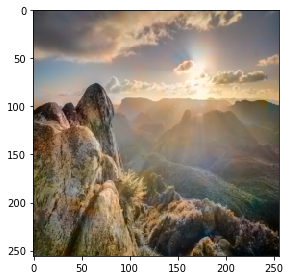

In [ ]:
#!/usr/bin/env python
__author__ = "Sreenivas Bhattiprolu"
__license__ = "Feel free to copy, I appreciate if you acknowledge Python for Microscopists"

# https://www.youtube.com/watch?v=EujccFRio7o



import tensorflow as tf
from keras.preprocessing.image import img_to_array, load_img
from skimage.transform import resize
from skimage.io import imsave, imshow
import numpy as np
from skimage.color import rgb2lab, lab2rgb
###########################################################
#Load saved model and test on images.
#colorize_autoencoder300.model is trained for 300 epochs
#

model = tf.keras.models.load_model('drive/MyDrive/Colab Notebooks/ImageProcessing/AutoEncoders/colorize_autoencoder.model',
                                   custom_objects=None,
                                   compile=True)

img1_color=[]

#resmi load_img ile yükleyince en,boy,kanal şeklinde yükleniyor ancak resize etmek için önce array yapıp sonra resize fonksiyonu ile boyutunu değiştiriyoruz
# sonra bir listeye yazıyoruz, ardından bu listeyi np.array'a çeviriyoruz.
img1=img_to_array(load_img('drive/MyDrive/data/resimler/manzara/030.jpg'))
img1 = resize(img1 ,(256,256))
img1_color.append(img1)
img1_color = np.array(img1_color, dtype=float)

#burada resmimizi rgb formatından lab formatına çevirdik ...
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color)
output1 = output1*128

result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
imshow(lab2rgb(result))
imsave("result.png", lab2rgb(result))